In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
gaussian_norm = 1 / np.sqrt(np.pi)
gauss_points, gauss_weights = np.polynomial.hermite.hermgauss(300)
gauss_points = gauss_points * np.sqrt(2)

def Phi(mu, delta0, bias, thres):
    integrand = bias + np.tanh(mu + np.sqrt(delta0) * gauss_points - thres)
    return gaussian_norm * np.dot(integrand, gauss_weights)

def derPhi(mu, delta0, thres):
    integrand = 1 / (np.cosh(mu + np.sqrt(delta0) * gauss_points - thres) ** 2)
    return gaussian_norm * np.dot(integrand, gauss_weights)


In [3]:
N_E = 800
N_I = 200
N = 1000
sigma = 0.45
thres = 2.1  
bias = 1.0   
n0 = np.zeros(N)


def system_equations(x, g, J0, tau_c):
    k1, k2 = x
    delta0 = (k2 ** 2)
    term1 = -k1 + (N_E - g * N_I) * J0 * Phi(k1, delta0, bias, thres) + sigma * np.sqrt(N * tau_c) * derPhi(k1, delta0, thres) * k2
    term2 = -k2 + sigma * np.sqrt(N * tau_c) * Phi(k1, delta0, bias, thres)
    return [term1, term2]


/Users/zhangmeiyi/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/var/folders/d5/_yfwrx_97hz9k65168tj_cj40000gn/T/ipykernel_43731/2554117936.py:10: RuntimeWarning: overflow encountered in square
  integrand = 1 / (np.cosh(mu + np.sqrt(delta0) * gauss_points - thres) ** 2)
/var/folders/d5/_yfwrx_97hz9k65168tj_cj40000gn/T/ipykernel_43731/2554117936.py:10: RuntimeWarning: overflow encountered in cosh
  integrand = 1 / (np.cosh(mu + np.sqrt(delta0) * gauss_points - thres) ** 2)
/Users/zhangmeiyi/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


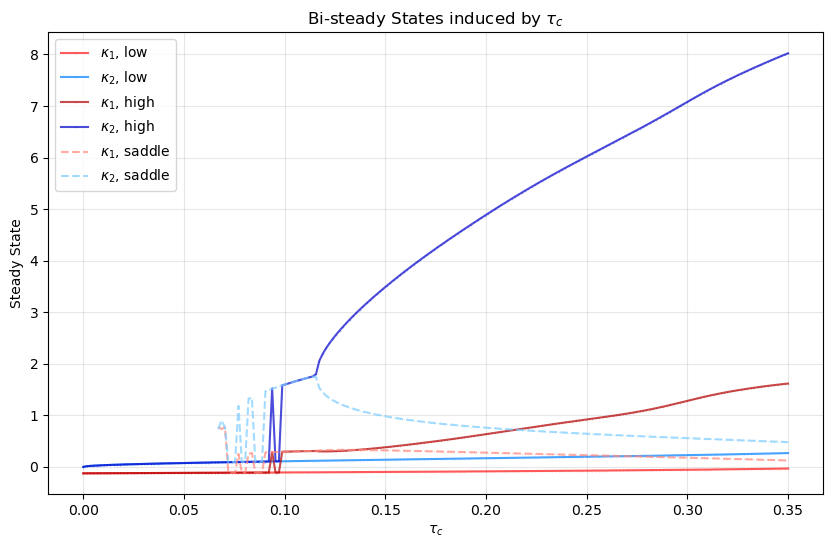

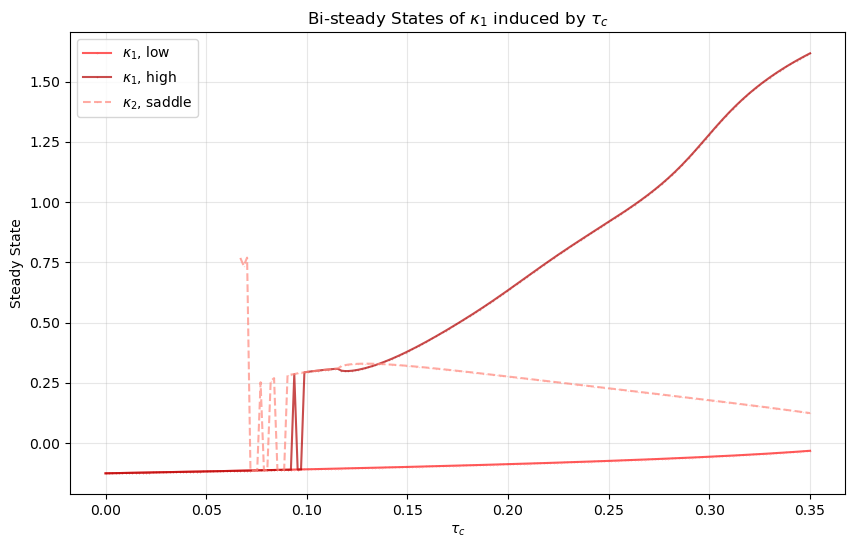

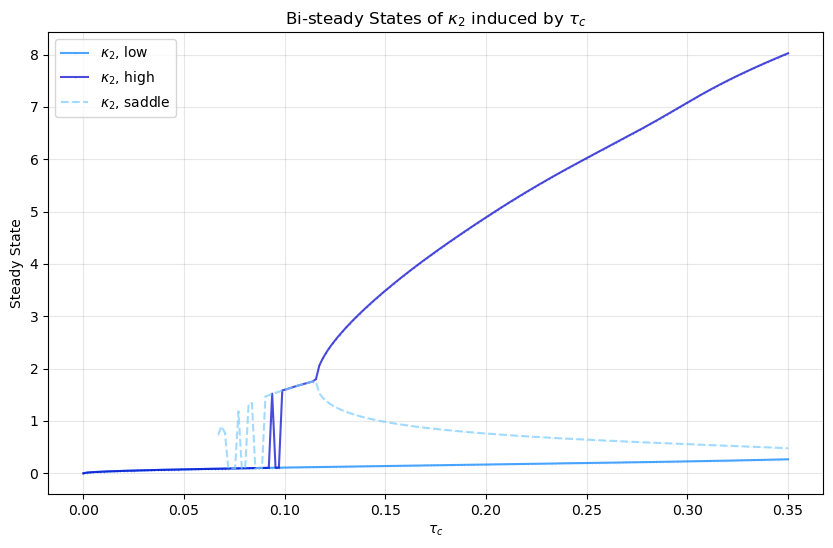

In [4]:
g = 4.9  # 给定g值
J0 = 0.03  # 给定J0值
tau_c_values = np.linspace(0.0, 0.35, 210)


# 存储两种初始条件下的稳态解
steady_states_near_zero = []  # 存储初始值接近0时的解
steady_states_large = []      # 存储初始值较大时的解
steady_states_saddle = []     # 存储鞍点解

for tau_c in tau_c_values:
    # 初始猜测值1：接近0
    initial_guess_near_zero = [-0.001, -0.001]
    steady_state_near_zero = fsolve(system_equations, initial_guess_near_zero, args=(g, J0, tau_c))
    steady_states_near_zero.append(steady_state_near_zero)
    
    # 初始猜测值2：较大值
    initial_guess_large = [10.0, 10.0]
    steady_state_large = fsolve(system_equations, initial_guess_large, args=(g, J0, tau_c))
    steady_states_large.append(steady_state_large)
    
    # 初始猜测值3：中间值，尝试找到鞍点
    initial_guess_saddle = [0.77, 0.77]
    steady_state_saddle = fsolve(system_equations, initial_guess_saddle, args=(g, J0, tau_c))
    steady_states_saddle.append(steady_state_saddle)

# 绘图时区分两种初始条件的解
# 提取kappa1和kappa2的值
kappa1_near_zero = [state[0] for state in steady_states_near_zero]
kappa2_near_zero = [state[1] for state in steady_states_near_zero]

kappa1_large = [state[0] for state in steady_states_large]
kappa2_large = [state[1] for state in steady_states_large]

kappa1_saddle = [state[0] for state in steady_states_saddle]
kappa2_saddle = [state[1] for state in steady_states_saddle]

# 绘制图形
plt.figure(figsize=(10, 6))

plt.plot(tau_c_values, kappa1_near_zero, color="#FF1717", linestyle='-', marker='o', label='$\\kappa_1$, low', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values, kappa2_near_zero, color="#0080FF", linestyle='-', marker='o', label='$\\kappa_2$, low', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values, kappa1_large, color="#B20000", linestyle='-', marker='s', label='$\\kappa_1$, high', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values, kappa2_large, color='#0000CD', linestyle='-', marker='s', label='$\\kappa_2$, high', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values[40:], kappa1_saddle[40:], color="#FF887D", linestyle='--', marker='^', label='$\\kappa_1$, saddle', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values[40:], kappa2_saddle[40:], color="#7DCDFF", linestyle='--', marker='^', label='$\\kappa_2$, saddle', markersize=0.1, alpha=0.7)

plt.xlabel('$\\tau_c$')
plt.ylabel('Steady State')
plt.title('Bi-steady States induced by $\\tau_c$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(tau_c_values, kappa1_near_zero, color="#FF1717", linestyle='-', marker='o', label='$\\kappa_1$, low', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values, kappa1_large, color="#B20000", linestyle='-', marker='s', label='$\\kappa_1$, high', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values[40:], kappa1_saddle[40:], color="#FF887D", linestyle='--', marker='^', label='$\\kappa_2$, saddle', markersize=0.1, alpha=0.7)

plt.xlabel('$\\tau_c$')
plt.ylabel('Steady State')
plt.title('Bi-steady States of $\\kappa_1$ induced by $\\tau_c$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(tau_c_values, kappa2_near_zero, color="#0080FF", linestyle='-', marker='o', label='$\\kappa_2$, low', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values, kappa2_large, color='#0000CD', linestyle='-', marker='s',  label='$\\kappa_2$, high', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values[40:], kappa2_saddle[40:], color="#7DCDFF", linestyle='--', marker='^', label='$\\kappa_2$, saddle', markersize=0.1, alpha=0.7)

plt.xlabel('$\\tau_c$')
plt.ylabel('Steady State')
plt.title('Bi-steady States of $\\kappa_2$ induced by $\\tau_c$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [5]:
def phi_vec(x_vec):
    return bias + np.tanh(x_vec - thres)

N_trials = 5
time_scale = 1.0
N_time= 2000
dt = 0.01
n0_vec = np.zeros(N)    
n0_vec[:N_E] = N*J0*np.ones(N_E)
n0_vec[N_E:] = -g*N*J0*np.ones(N_I)

In [6]:


def activity_simulation(tauc):
    
    e_vec = np.ones(N)
    eta_vec = np.random.normal(0,1,N)
    y_mat = np.random.normal(0,1,(N,N))
        
    m1_vec = e_vec
    m2_vec = eta_vec
    n1_vec = sigma * np.sqrt(N * tauc) * eta_vec + n0_vec
    n2_vec = sigma * np.sqrt(N * tauc) * e_vec
    J_mat = (1/N)*(np.outer(m1_vec, n1_vec)+np.outer(m2_vec, n2_vec)) + sigma * np.sqrt((1-2*tauc)/N)*y_mat
        
        
    x_rawdata = np.zeros((N, N_time))
    x0 = -0.001 * np.ones(N)
    x_rawdata[:, 0] = x0
    for t in range(N_time-1):
        x_rawdata[: ,t+1] = x_rawdata[:, t] + dt * (-x_rawdata[:, t] + J_mat @ phi_vec(x_rawdata[:, t])) / time_scale
    k1_low = np.inner(x_rawdata[:,-1], m1_vec) / np.inner(m1_vec, m1_vec)
    k2_low = np.inner(x_rawdata[:,-1], m2_vec) / np.inner(m2_vec, m2_vec)
    
    x0 = 10.0 * np.ones(N)
    x_rawdata[:, 0] = x0
    for t in range(N_time-1):
        x_rawdata[: ,t+1] = x_rawdata[:, t] + dt * (-x_rawdata[:, t] + J_mat @ phi_vec(x_rawdata[:, t])) / time_scale
    k1_high = np.inner(x_rawdata[:,-1], m1_vec) / np.inner(m1_vec, m1_vec)
    k2_high = np.inner(x_rawdata[:,-1], m2_vec) / np.inner(m2_vec, m2_vec)
    
    x0 = 0.77 * np.ones(N)
    x_rawdata[:, 0] = x0
    for t in range(N_time-1):
        x_rawdata[: ,t+1] = x_rawdata[:, t] + dt * (-x_rawdata[:, t] + J_mat @ phi_vec(x_rawdata[:, t])) / time_scale
    k1_mid = np.inner(x_rawdata[:,-1], m1_vec) / np.inner(m1_vec, m1_vec)
    k2_mid = np.inner(x_rawdata[:,-1], m2_vec) / np.inner(m2_vec, m2_vec)
    
    return k1_low, k2_low, k1_high, k2_high, k1_mid, k2_mid
        

In [7]:
tau_c_values_simu = np.linspace(0.0, 0.35, 100)

k1_simu_low = np.zeros((len(tau_c_values_simu), N_trials))
k2_simu_low = np.zeros((len(tau_c_values_simu), N_trials))
k1_simu_high = np.zeros((len(tau_c_values_simu), N_trials))
k2_simu_high = np.zeros((len(tau_c_values_simu), N_trials))
k1_simu_mid = np.zeros((len(tau_c_values_simu), N_trials))
k2_simu_mid = np.zeros((len(tau_c_values_simu), N_trials))


In [8]:

for tauc_idx,tauc in enumerate(tau_c_values_simu):
    print(f"Simulating for tau_c = {tauc:.3f}")
    for k_trial in range(N_trials):
        k1_l, k2_l, k1_h, k2_h, k1_m, k2_m= activity_simulation(tauc)
        k1_simu_low[tauc_idx, k_trial] = k1_l
        k2_simu_low[tauc_idx, k_trial] = k2_l
        k1_simu_high[tauc_idx, k_trial] = k1_h
        k2_simu_high[tauc_idx, k_trial] = k2_h
        k1_simu_mid[tauc_idx, k_trial] = k1_m
        k2_simu_mid[tauc_idx, k_trial] = k2_m

Simulating for tau_c = 0.000
Simulating for tau_c = 0.004
Simulating for tau_c = 0.007
Simulating for tau_c = 0.011
Simulating for tau_c = 0.014
Simulating for tau_c = 0.018
Simulating for tau_c = 0.021
Simulating for tau_c = 0.025
Simulating for tau_c = 0.028
Simulating for tau_c = 0.032
Simulating for tau_c = 0.035
Simulating for tau_c = 0.039
Simulating for tau_c = 0.042
Simulating for tau_c = 0.046
Simulating for tau_c = 0.049
Simulating for tau_c = 0.053
Simulating for tau_c = 0.057
Simulating for tau_c = 0.060
Simulating for tau_c = 0.064
Simulating for tau_c = 0.067
Simulating for tau_c = 0.071
Simulating for tau_c = 0.074
Simulating for tau_c = 0.078
Simulating for tau_c = 0.081
Simulating for tau_c = 0.085
Simulating for tau_c = 0.088
Simulating for tau_c = 0.092
Simulating for tau_c = 0.095
Simulating for tau_c = 0.099
Simulating for tau_c = 0.103
Simulating for tau_c = 0.106
Simulating for tau_c = 0.110
Simulating for tau_c = 0.113
Simulating for tau_c = 0.117
Simulating for

KeyboardInterrupt: 

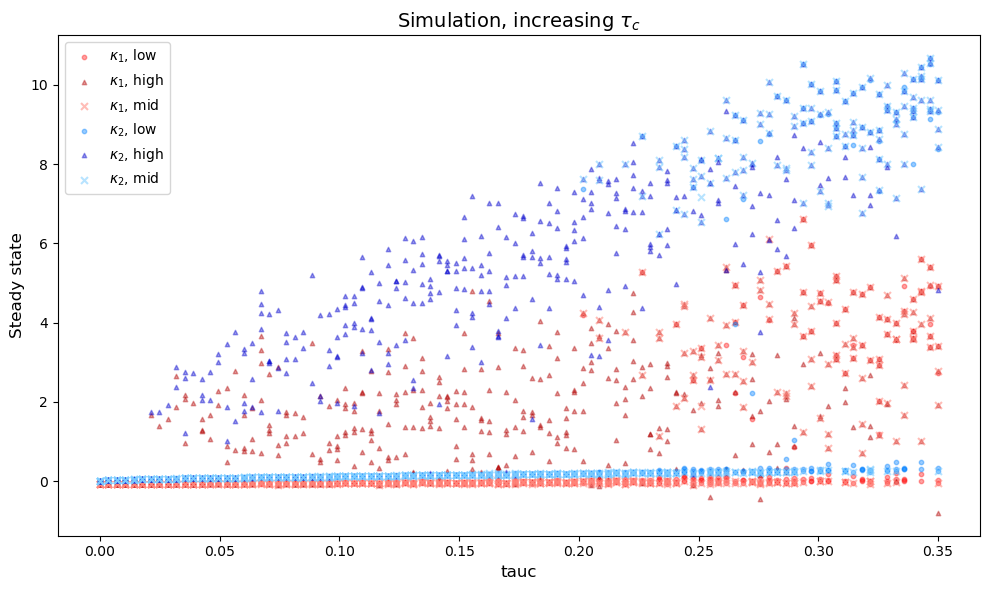

In [ ]:
plt.figure(figsize=(10, 6))
x = np.repeat(tau_c_values_simu, N_trials)

plt.scatter(x, k1_simu_low.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_1$, low', marker='o', color="#FF1717")
plt.scatter(x, k1_simu_high.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_1$, high', marker='^', color="#B20000")
plt.scatter(x, k1_simu_mid.flatten(), 
            alpha=0.55, s=25, label='$\\kappa_1$, mid', marker='x', color="#FF887D")
plt.scatter(x, k2_simu_low.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_2$, low', marker='o', color="#0080FF")
plt.scatter(x, k2_simu_high.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_2$, high', marker='^', color="#0000CD")
plt.scatter(x, k2_simu_mid.flatten(), 
            alpha=0.55, s=25, label='$\\kappa_2$, mid', marker='x', color="#7DCDFF")


# 添加标题和标签
plt.title('Simulation, increasing $\\tau_c$', fontsize=14)
plt.xlabel('tauc', fontsize=12)
plt.ylabel('Steady state', fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
        
     

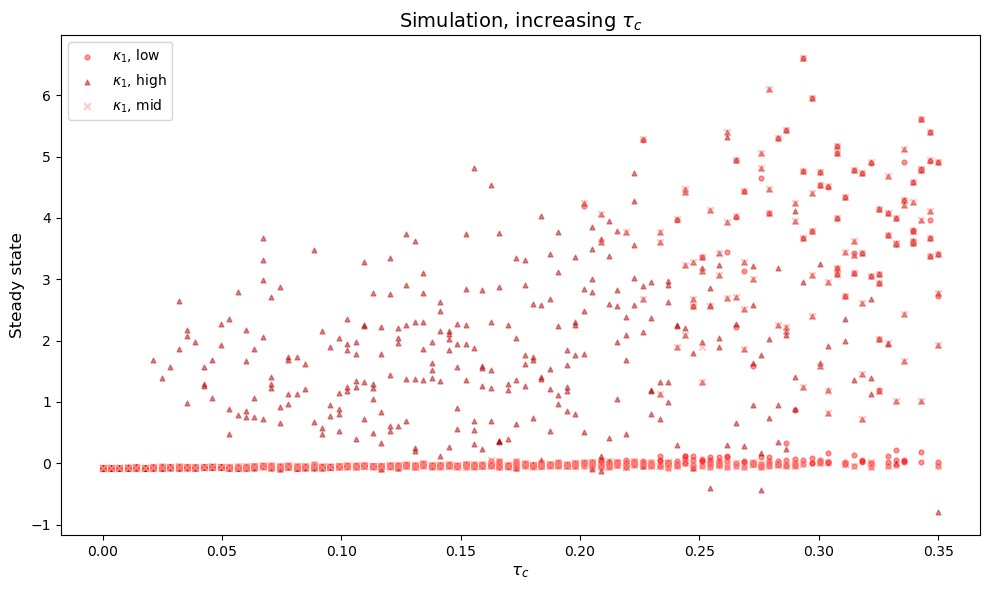

In [ ]:
plt.figure(figsize=(10, 6))

# 定义透明度和点大小
alpha = 0.45  # 高透明度
s = 12       # 点大小
x = np.repeat(tau_c_values_simu, N_trials)
plt.scatter(x, k1_simu_low.flatten(), 
            alpha=alpha, s=s, label='$\\kappa_1$, low', marker='o', color="#FF1717")
plt.scatter(x, k1_simu_high.flatten(), 
            alpha=alpha, s=s, label='$\\kappa_1$, high', marker='^', color="#B20000")
plt.scatter(x, k1_simu_mid.flatten(), 
            alpha=alpha, s=s+10, label='$\\kappa_1$, mid', marker='x', color="#FF887D")

# 添加标题和标签
plt.title('Simulation, increasing $\\tau_c$', fontsize=14)
plt.xlabel('$\\tau_c$', fontsize=12)
plt.ylabel('Steady state', fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
        
     

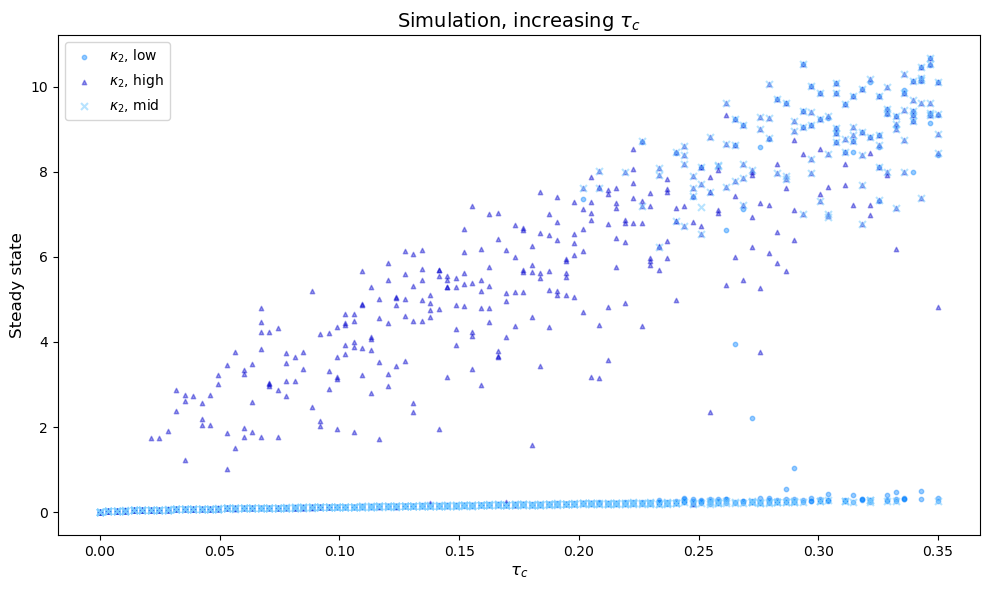

In [ ]:
plt.figure(figsize=(10, 6))

alpha = 0.45  # 高透明度
s = 12       # 点大小

x = np.repeat(tau_c_values_simu, N_trials)
plt.scatter(x, k2_simu_low.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_2$, low', marker='o', color="#0080FF")
plt.scatter(x, k2_simu_high.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_2$, high', marker='^', color="#0000CD")
plt.scatter(x, k2_simu_mid.flatten(), 
            alpha=0.55, s=25, label='$\\kappa_2$, mid', marker='x', color="#7DCDFF")

# 添加标题和标签
plt.title('Simulation, increasing $\\tau_c$', fontsize=14)
plt.xlabel('$\\tau_c$', fontsize=12)
plt.ylabel('Steady state', fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
        
     

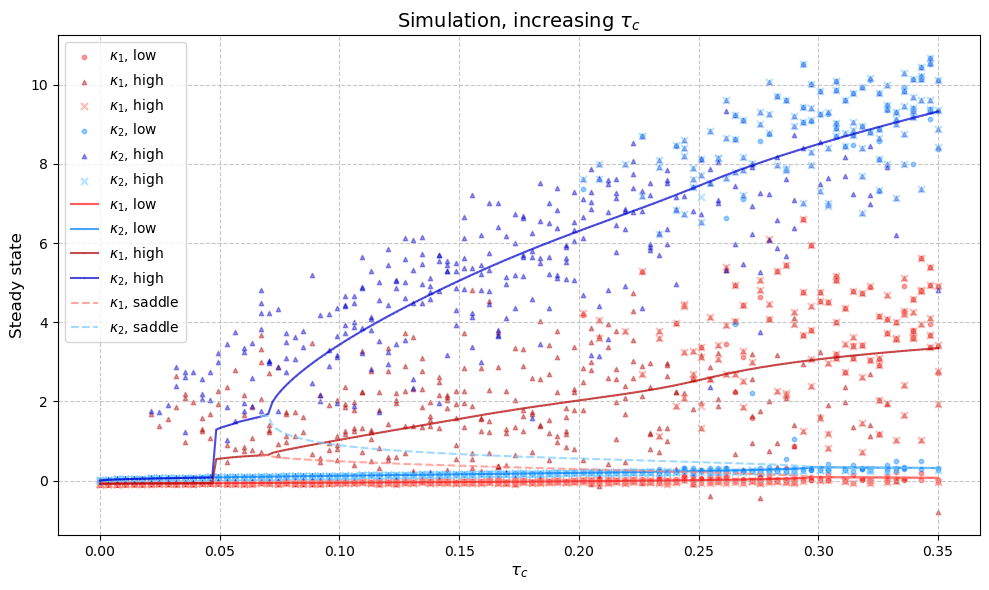

In [ ]:
plt.figure(figsize=(10, 6))
x = np.repeat(tau_c_values_simu, N_trials)
plt.scatter(x, k1_simu_low.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_1$, low', marker='o', color="#FF1717")
plt.scatter(x, k1_simu_high.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_1$, high', marker='^', color="#B20000")
plt.scatter(x, k1_simu_mid.flatten(), 
            alpha=0.55, s=25, label='$\\kappa_1$, high', marker='x', color="#FF887D")
plt.scatter(x, k2_simu_low.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_2$, low', marker='o', color="#0080FF")
plt.scatter(x, k2_simu_high.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_2$, high', marker='^', color="#0000CD")
plt.scatter(x, k2_simu_mid.flatten(), 
            alpha=0.55, s=25, label='$\\kappa_2$, high', marker='x', color="#7DCDFF")


plt.plot(tau_c_values, kappa1_near_zero, color="#FF1717", linestyle='-', marker='o', label='$\\kappa_1$, low', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values, kappa2_near_zero, color="#0080FF", linestyle='-', marker='o', label='$\\kappa_2$, low', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values, kappa1_large, color="#B20000", linestyle='-', marker='s', label='$\\kappa_1$, high', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values, kappa2_large, color='#0000CD', linestyle='-', marker='s', label='$\\kappa_2$, high', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values[40:], kappa1_saddle[40:], color="#FF887D", linestyle='--', marker='^', label='$\\kappa_1$, saddle', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values[40:], kappa2_saddle[40:], color="#7DCDFF", linestyle='--', marker='^', label='$\\kappa_2$, saddle', markersize=0.1, alpha=0.7)

# 添加标题和标签
plt.title('Simulation, increasing $\\tau_c$', fontsize=14)
plt.xlabel('$\\tau_c$', fontsize=12)
plt.ylabel('Steady state', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
        
     

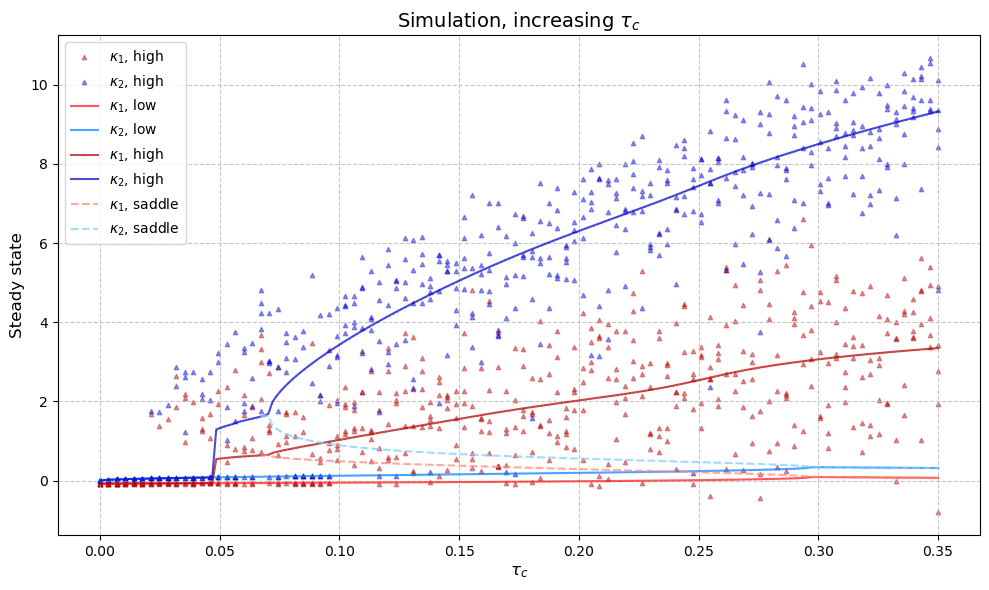

In [ ]:
plt.figure(figsize=(10, 6))


x = np.repeat(tau_c_values_simu, N_trials)
plt.scatter(x, k1_simu_high.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_1$, high', marker='^', color="#B20000")
plt.scatter(x, k2_simu_high.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_2$, high', marker='^', color="#0000CD")



plt.plot(tau_c_values, kappa1_near_zero, color="#FF1717", linestyle='-', marker='o', label='$\\kappa_1$, low', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values, kappa2_near_zero, color="#0080FF", linestyle='-', marker='o', label='$\\kappa_2$, low', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values, kappa1_large, color="#B20000", linestyle='-', marker='s', label='$\\kappa_1$, high', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values, kappa2_large, color='#0000CD', linestyle='-', marker='s', label='$\\kappa_2$, high', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values[40:], kappa1_saddle[40:], color="#FF887D", linestyle='--', marker='^', label='$\\kappa_1$, saddle', markersize=0.1, alpha=0.7)
plt.plot(tau_c_values[40:], kappa2_saddle[40:], color="#7DCDFF", linestyle='--', marker='^', label='$\\kappa_2$, saddle', markersize=0.1, alpha=0.7)

# 添加标题和标签
plt.title('Simulation, increasing $\\tau_c$', fontsize=14)
plt.xlabel('$\\tau_c$', fontsize=12)
plt.ylabel('Steady state', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
        
     

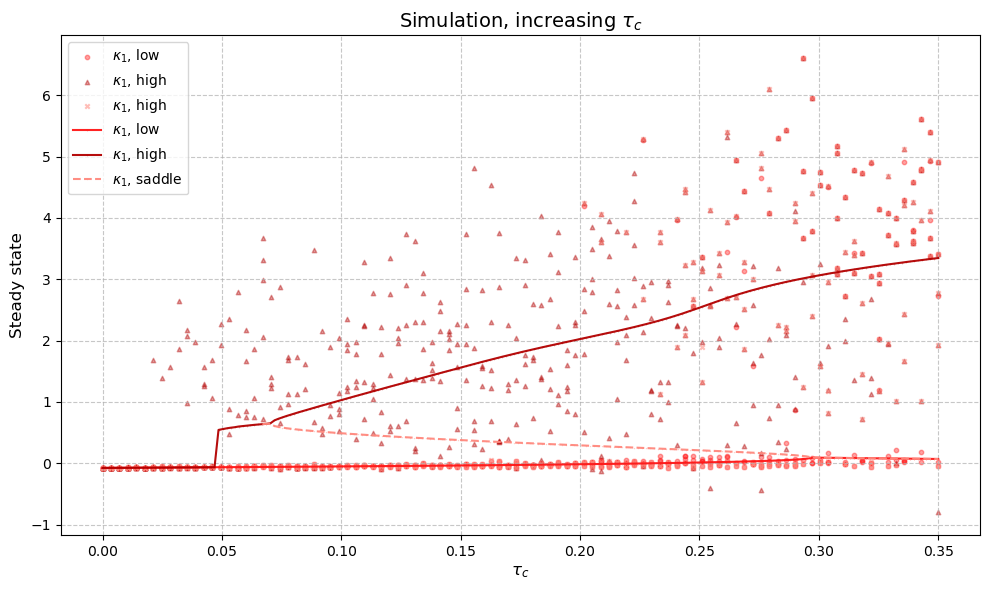

In [ ]:
plt.figure(figsize=(10, 6))


x = np.repeat(tau_c_values_simu, N_trials)
plt.scatter(x, k1_simu_low.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_1$, low', marker='o', color="#FF1717")
plt.scatter(x, k1_simu_high.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_1$, high', marker='^', color="#B20000")
plt.scatter(x, k1_simu_mid.flatten(), 
            alpha=0.55, s=10, label='$\\kappa_1$, high', marker='x', color="#FF887D")



plt.plot(tau_c_values, kappa1_near_zero, color="#FF1717", linestyle='-', marker='o', label='$\\kappa_1$, low', markersize=0.1, alpha=0.95)
plt.plot(tau_c_values, kappa1_large, color="#B20000", linestyle='-', marker='s', label='$\\kappa_1$, high', markersize=0.1, alpha=0.95)
plt.plot(tau_c_values[40:], kappa1_saddle[40:], color="#FF887D", linestyle='--', marker='^', label='$\\kappa_1$, saddle', markersize=0.1, alpha=0.95)


# 添加标题和标签
plt.title('Simulation, increasing $\\tau_c$', fontsize=14)
plt.xlabel('$\\tau_c$', fontsize=12)
plt.ylabel('Steady state', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

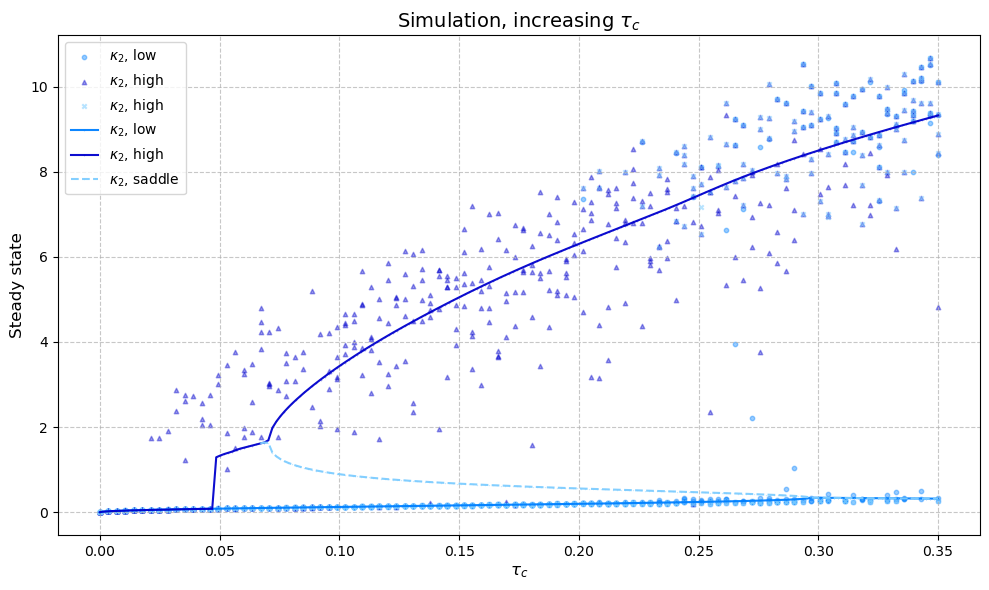

In [ ]:
plt.figure(figsize=(10, 6))

alpha = 0.45  # 高透明度
s = 10       # 点大小

x = np.repeat(tau_c_values_simu, N_trials)
plt.scatter(x, k2_simu_low.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_2$, low', marker='o', color="#0080FF")
plt.scatter(x, k2_simu_high.flatten(), 
            alpha=0.4, s=10, label='$\\kappa_2$, high', marker='^', color="#0000CD")
plt.scatter(x, k2_simu_mid.flatten(), 
            alpha=0.55, s=10, label='$\\kappa_2$, high', marker='x', color="#7DCDFF")

plt.plot(tau_c_values, kappa2_near_zero, color="#0080FF", linestyle='-', marker='o', label='$\\kappa_2$, low', markersize=0.1, alpha=0.95)
plt.plot(tau_c_values, kappa2_large, color='#0000CD', linestyle='-', marker='s', label='$\\kappa_2$, high', markersize=0.1, alpha=0.95)
plt.plot(tau_c_values[40:], kappa2_saddle[40:], color="#7DCDFF", linestyle='--', marker='^', label='$\\kappa_2$, saddle', markersize=0.1, alpha=0.95)



# 添加标题和标签
plt.title('Simulation, increasing $\\tau_c$', fontsize=14)
plt.xlabel('$\\tau_c$', fontsize=12)
plt.ylabel('Steady state', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
        
     